In [3]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Styling
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")
%matplotlib inline

# Optional - to suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [5]:
# Load the Netflix dataset
df = pd.read_csv('netflix_titles.csv')

# Preview the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Summary statistics (only for numeric columns, if any)
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
# Count missing values in each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
# Distribution of 'type' column (Movie vs TV Show)
df['type'].value_counts()

# Top 10 countries contributing to Netflix content
df['country'].value_counts().head(10)

# Most common genres
df['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


In [10]:
# Fill missing 'director', 'cast', and 'country' with "Not Available"
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Not Available', inplace=True)

# Drop rows where 'date_added' or 'rating' is missing (they’re important for analysis)
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [12]:
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

# Extract Year and Month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [13]:
# Create a new column for content length (Movie: Minutes, TV Show: Seasons)
df['duration'].fillna('Not Available', inplace=True)
df['duration_type'] = df['duration'].apply(lambda x: 'Season(s)' if 'Season' in x else 'Minute(s)' if 'min' in x else 'Unknown')

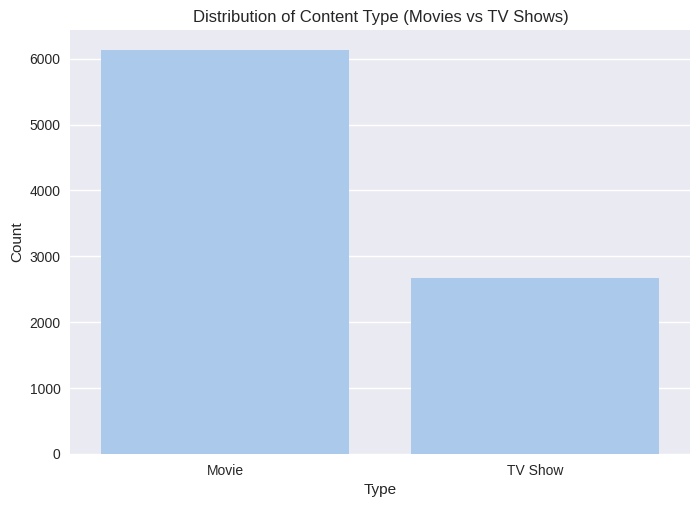

In [14]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type (Movies vs TV Shows)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

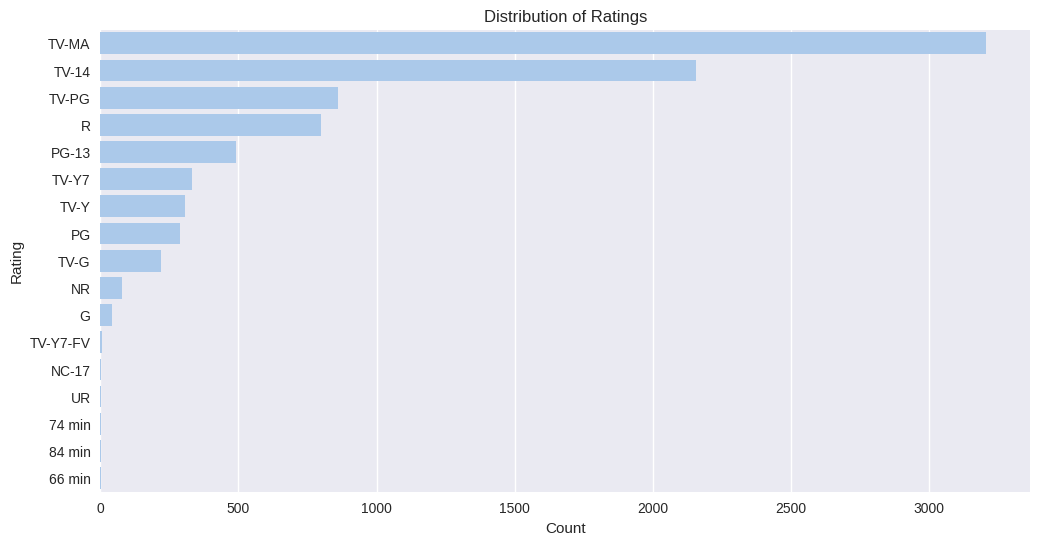

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

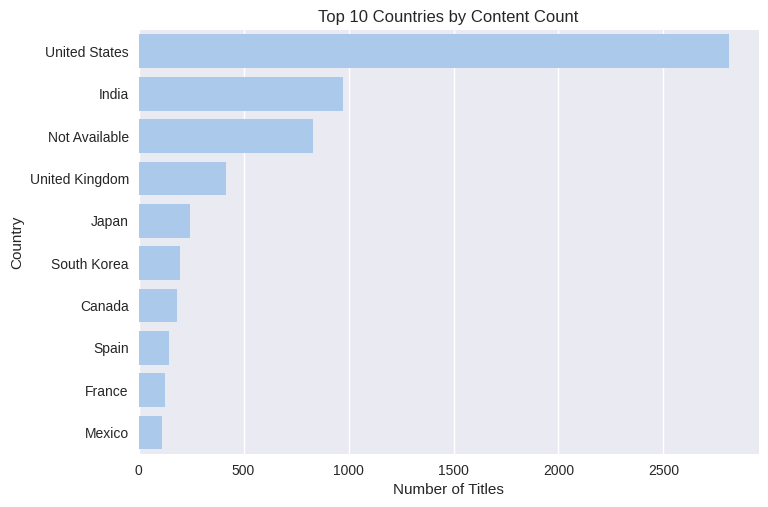

In [16]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

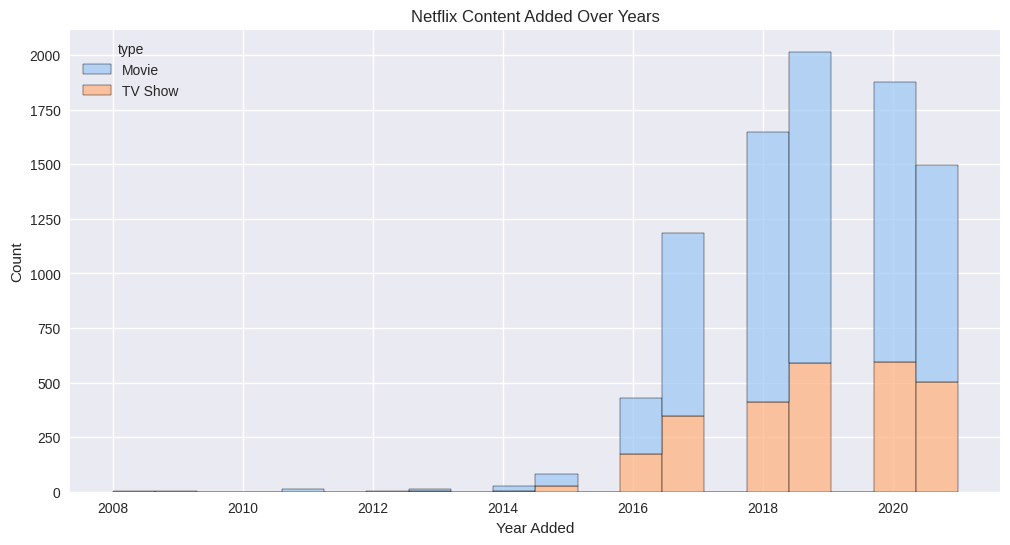

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='year_added', bins=20, kde=False, hue='type', multiple='stack')
plt.title('Netflix Content Added Over Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

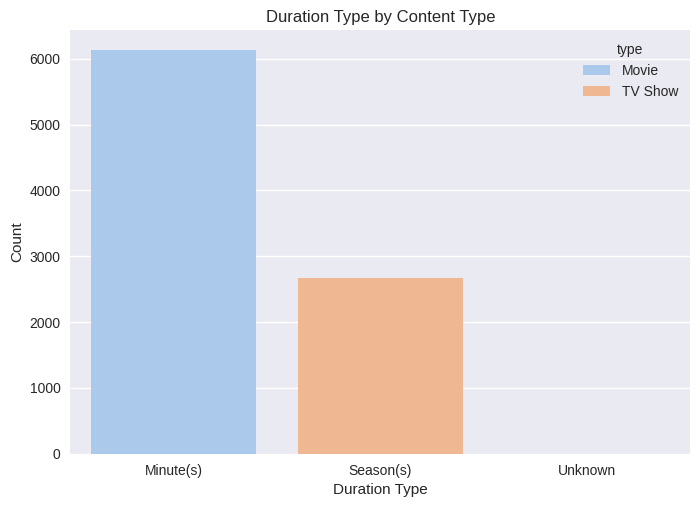

In [18]:
sns.countplot(data=df, x='duration_type', hue='type')
plt.title('Duration Type by Content Type')
plt.xlabel('Duration Type')
plt.ylabel('Count')
plt.show()

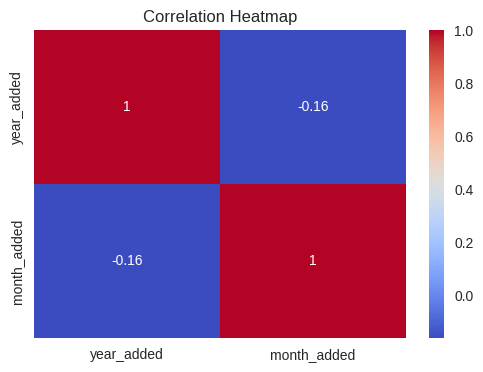

In [19]:
# Only selecting numeric-like columns
numeric_df = df[['year_added', 'month_added']]

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()